In [1]:
import pandas as pd
from pathlib import Path

In [12]:
root_dir = Path.cwd().parent
filename = root_dir / "network_usage_aws_small.csv"
time_column = "t_parsed"
network_usage_column = "cumulative_parsed"
# hostnames = ["136.231.7.16"]
# hostname = "s3-r-w.eu-central-1.amazonaws.com"
hostnames = ["s3-w.eu-central-1.amazonaws.com", "s3-r-w.eu-central-1.amazonaws.com"]

In [13]:
df = pd.read_csv(filename)
df

,Unnamed: 0,#,host/name,direction,2s,10s,40s,cumulative,t,cumulative_parsed,t_parsed
0,0,1.0,172.30.74.51,=>,58.4Kb,58.4Kb,58.4Kb,14.6KB,2023-11-24-15-10-09,14600,2023-11-24 15:10:09
1,1,NaN,s3-w.eu-central-1.amazonaws.com,<=,461Kb,461Kb,461Kb,115KB,2023-11-24-15-10-09,115000,2023-11-24 15:10:09
2,2,2.0,172.30.74.51,=>,0b,0b,0b,0B,2023-11-24-15-10-09,0,2023-11-24 15:10:09
3,3,NaN,l03236.mshome.net,<=,568b,568b,568b,142B,2023-11-24-15-10-09,142,2023-11-24 15:10:09
4,4,3.0,255.255.255.255,=>,0b,0b,0b,0B,2023-11-24-15-10-09,0,2023-11-24 15:10:09
...,...,...,...,...,...,...,...,...,...,...,...
2211,2211,NaN,s3-r-w.eu-central-1.amazonaws.com,<=,21.3Mb,21.3Mb,21.3Mb,5.33MB,2023-11-24-15-02-09,5330000,2023-11-24 15:02:09
2212,2212,2.0,172.30.74.51,=>,1.32Kb,1.32Kb,1.32Kb,339B,2023-11-24-15-02-09,339,2023-11-24 15:02:09
2213,2213,NaN,l03236.mshome.net,<=,2.15Kb,2.15Kb,2.15Kb,551B,2023-11-24-15-02-09,551,2023-11-24 15:02:09
2214,2214,3.0,mdns.mcast.net,=>,0b,0b,0b,0B,2023-11-24-15-02-09,0,2023-11-24 15:02:09


In [14]:
df_ld = df[df["cumulative_parsed"] > 10000]
df_ld = df_ld[df_ld["direction"] == "<="]
df_ld

,Unnamed: 0,#,host/name,direction,2s,10s,40s,cumulative,t,cumulative_parsed,t_parsed
1,1,NaN,s3-w.eu-central-1.amazonaws.com,<=,461Kb,461Kb,461Kb,115KB,2023-11-24-15-10-09,115000,2023-11-24 15:10:09
9,9,NaN,s3-r-w.eu-central-1.amazonaws.com,<=,28.2Mb,28.2Mb,28.2Mb,7.05MB,2023-11-24-15-08-49,7050000,2023-11-24 15:08:49
15,15,NaN,3.5.137.114,<=,10.7Mb,10.7Mb,10.7Mb,2.67MB,2023-11-24-14-59-27,2670000,2023-11-24 14:59:27
19,19,NaN,s3-r-w.eu-central-1.amazonaws.com,<=,11.1Mb,11.1Mb,11.1Mb,2.77MB,2023-11-24-14-57-07,2770000,2023-11-24 14:57:07
23,23,NaN,s3-r-w.eu-central-1.amazonaws.com,<=,24.8Mb,24.8Mb,24.8Mb,6.21MB,2023-11-24-15-04-13,6210000,2023-11-24 15:04:13
...,...,...,...,...,...,...,...,...,...,...,...
2185,2185,NaN,s3-r-w.eu-central-1.amazonaws.com,<=,25.1Mb,25.1Mb,25.1Mb,6.27MB,2023-11-24-15-08-15,6270000,2023-11-24 15:08:15
2191,2191,NaN,s3-r-w.eu-central-1.amazonaws.com,<=,21.4Mb,21.4Mb,21.4Mb,5.36MB,2023-11-24-15-04-35,5360000,2023-11-24 15:04:35
2199,2199,NaN,s3-r-w.eu-central-1.amazonaws.com,<=,10.6Mb,10.6Mb,10.6Mb,2.66MB,2023-11-24-15-00-38,2660000,2023-11-24 15:00:38
2205,2205,NaN,s3-r-w.eu-central-1.amazonaws.com,<=,21.2Mb,21.2Mb,21.2Mb,5.30MB,2023-11-24-15-03-35,5300000,2023-11-24 15:03:35


In [15]:
import numpy as np
np.unique(df_ld["host/name"])  # 13. is microsoft (vscode)

array(['3.5.135.15', '3.5.137.114', '3.5.137.142', '3.5.138.136',
       '3.5.139.156', '52.219.140.58', '52.219.169.139', '52.219.169.246',
       '52.219.169.87', '52.219.170.11', '52.219.170.78', '52.219.170.98',
       '52.219.171.123', '52.219.171.131', '52.219.171.142',
       '52.219.171.163', '52.219.46.16', '52.219.46.32', '52.219.46.86',
       '52.219.75.42', 's3-r-w.eu-central-1.amazonaws.com',
       's3-w.eu-central-1.amazonaws.com'], dtype=object)

In [21]:
df = pd.read_csv(filename)
df[time_column] = pd.to_datetime(df[time_column])
df[time_column] = df[time_column] - min(df[time_column])
df = df.loc[df["direction"] == "<="]
df = df.loc[(df["host/name"] == hostnames[0]) | (df["host/name"] == hostnames[1])]
df

,Unnamed: 0,#,host/name,direction,2s,10s,40s,cumulative,t,cumulative_parsed,t_parsed
1,1,NaN,s3-w.eu-central-1.amazonaws.com,<=,461Kb,461Kb,461Kb,115KB,2023-11-24-15-10-09,115000,0 days 00:14:57
9,9,NaN,s3-r-w.eu-central-1.amazonaws.com,<=,28.2Mb,28.2Mb,28.2Mb,7.05MB,2023-11-24-15-08-49,7050000,0 days 00:13:37
19,19,NaN,s3-r-w.eu-central-1.amazonaws.com,<=,11.1Mb,11.1Mb,11.1Mb,2.77MB,2023-11-24-14-57-07,2770000,0 days 00:01:55
23,23,NaN,s3-r-w.eu-central-1.amazonaws.com,<=,24.8Mb,24.8Mb,24.8Mb,6.21MB,2023-11-24-15-04-13,6210000,0 days 00:09:01
35,35,NaN,s3-r-w.eu-central-1.amazonaws.com,<=,26.8Mb,26.8Mb,26.8Mb,6.69MB,2023-11-24-15-02-33,6690000,0 days 00:07:21
...,...,...,...,...,...,...,...,...,...,...,...
2185,2185,NaN,s3-r-w.eu-central-1.amazonaws.com,<=,25.1Mb,25.1Mb,25.1Mb,6.27MB,2023-11-24-15-08-15,6270000,0 days 00:13:03
2191,2191,NaN,s3-r-w.eu-central-1.amazonaws.com,<=,21.4Mb,21.4Mb,21.4Mb,5.36MB,2023-11-24-15-04-35,5360000,0 days 00:09:23
2199,2199,NaN,s3-r-w.eu-central-1.amazonaws.com,<=,10.6Mb,10.6Mb,10.6Mb,2.66MB,2023-11-24-15-00-38,2660000,0 days 00:05:26
2205,2205,NaN,s3-r-w.eu-central-1.amazonaws.com,<=,21.2Mb,21.2Mb,21.2Mb,5.30MB,2023-11-24-15-03-35,5300000,0 days 00:08:23


In [24]:
df = df.groupby(['t_parsed']).agg({'cumulative_parsed': 'sum'})
df['cumulative_parsed'] = df['cumulative_parsed'] / 1e6  # to MB
df

,cumulative_parsed
t_parsed,
0 days 00:00:06,1.350
0 days 00:00:18,5.530
0 days 00:00:21,5.810
0 days 00:00:23,6.870
0 days 00:00:29,5.910
...,...
0 days 00:16:20,10.710
0 days 00:16:22,11.100
0 days 00:16:24,7.670


In [18]:
from datetime import datetime
from dateutil.parser import parse
total_duration = max(df.index)
minutes = total_duration.seconds // 60
seconds = total_duration.seconds % 60
print(f"HydroMT ran for {minutes} minutes and {seconds} seconds")
print(f"hydromt used {sum(df['cumulative_parsed'])}MB of data")

HydroMT ran for 16 minutes and 28 seconds
hydromt used 1479.3424310000012MB of data


In [19]:
df.to_csv("aws_small.csv")

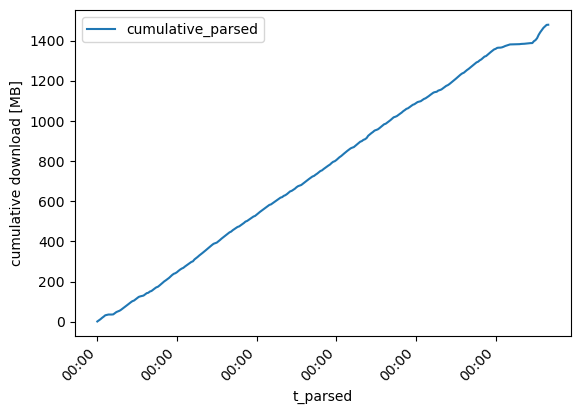

In [20]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots()

df.cumsum().reset_index().plot(x=time_column, y=network_usage_column, ax=ax)
dateformat = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(dateformat)
ax.set_ylabel("cumulative download [MB]")
fig.autofmt_xdate(rotation=45)

In [27]:
fig.savefig("minio_large.png")